<a href="https://colab.research.google.com/github/animeshmahajan8/Capstone-Project-Airbnb-NYC-2019-EDA/blob/Working/Animesh's_Individual_Airbnb_NYC_2019_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** 

##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 - Abhishek Kulkarni**
##### **Team Member 2 - Animesh Mahajan**
##### **Team Member 3 - NileshKumar Lavand**
##### **Team Member 4 - Prajwal Kulkarni**

# **Project Name** 

Write the summary here within 500-600 words.

# **GitHub Link -**


*https://github.com/animeshmahajan8/Capstone-Project-Airbnb-NYC-2019-EDA* GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:

# Import Libraries
import pandas as pd
import numpy as np

# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import warnings ()
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:

# Load Dataset 
url = 'https://raw.githubusercontent.com/animeshmahajan8/Capstone-Project-Airbnb-NYC-2019-EDA/main/Airbnb%20NYC%202019.csv'
df = pd.read_csv(url)

### Dataset First View

In [ ]:

# Dataset First Look
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Dataset Rows & Columns count

In [ ]:

# Dataset Rows & Columns count
row_count, column_count = df.shape
print("Number of rows:", row_count)
print("Number of columns:", column_count)

Number of rows: 48895
Number of columns: 16


### Dataset Information

In [ ]:

# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:

# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 0


#### Missing Values/Null Values

In [ ]:

# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

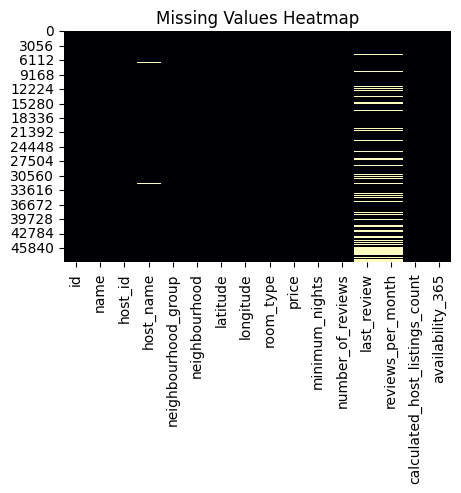

In [ ]:

# Visualizing the missing values

plt.figure(figsize=(5, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Missing Values Heatmap')
plt.show()

As, host_names and names are not that important in our analysis, so atleast we are good to fill those with some substitutes in both the columns!

In [ ]:

# Since both 'name' and 'host_name' has very less missing values as compared to the 
# entire dataset we can fill these missing values in both with unknown & no_name respectively!

df['name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)


In [ ]:

df[['host_name','name']].isnull().values.any() #checks if the null values still exist!

False

In [ ]:

no_of_hosts= df['host_name'].nunique()
print(f'The no of hosts in NYC: {no_of_hosts}')
no_of_listings= df['name'].nunique()
print(f'The total no of listings in NYC: {no_of_listings}')

The no of hosts in NYC: 11453
The total no of listings in NYC: 47906


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:

# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:

# Dataset Describe
df.describe(include= 'all').round(2)

id            name       host_id host_name  \
count      48895.00           48895  4.889500e+04     48895   
unique          NaN           47906           NaN     11453   
top             NaN  Hillside Hotel           NaN   Michael   
freq            NaN              18           NaN       417   
mean    19017143.24             NaN  6.762001e+07       NaN   
std     10983108.39             NaN  7.861097e+07       NaN   
min         2539.00             NaN  2.438000e+03       NaN   
25%      9471945.00             NaN  7.822033e+06       NaN   
50%     19677284.00             NaN  3.079382e+07       NaN   
75%     29152178.50             NaN  1.074344e+08       NaN   
max     36487245.00             NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood  latitude  longitude  \
count                48895         48895  48895.00   48895.00   
unique                   5           221       NaN        NaN   
top              Manhattan  Williamsburg       NaN        NaN   
freq                 21661          3920       NaN        NaN   
mean                   NaN           NaN     40.73     -73.95   
std                    NaN           NaN      0.05       0.05   
min                    NaN           NaN     40.50     -74.24   
25%                    NaN           NaN     40.69     -73.98   
50%                    NaN           NaN     40.72     -73.96   
75%                    NaN           NaN     40.76     -73.94   
max                    NaN           NaN     40.91     -73.71   

              room_type     price  minimum_nights  number_of_reviews  \
count             48895  48895.00        48895.00           48895.00   
unique                3       NaN             NaN                NaN   
top     Entire home/apt       NaN             NaN                NaN   
freq              25409       NaN             NaN                NaN   
mean                NaN    152.72            7.03              23.27   
std                 NaN    240.15           20.51              44.55   
min                 NaN      0.00            1.00               0.00   
25%                 NaN     69.00            1.00               1.00   
50%                 NaN    106.00            3.00               5.00   
75%                 NaN    175.00            5.00              24.00   
max                 NaN  10000.00         1250.00             629.00   

       last_review  reviews_per_month  calculated_host_listings_count  \
count        38843           38843.00                        48895.00   
unique        1764                NaN                             NaN   
top     2019-06-23                NaN                             NaN   
freq          1413                NaN                             NaN   
mean           NaN               1.37                            7.14   
std            NaN               1.68                           32.95   
min            NaN               0.01                            1.00   
25%            NaN               0.19                            1.00   
50%            NaN               0.72                            1.00   
75%            NaN               2.02                            2.00   
max            NaN              58.50                          327.00   

        availability_365  
count           48895.00  
unique               NaN  
top                  NaN  
freq                 NaN  
mean              112.78  
std               131.62  
min                 0.00  
25%                 0.00  
50%                45.00  
75%               227.00  
max               365.00

### Variables Description 

ID	:  Unique ID  
Name	:  Name of the listing  
Host ID	 :  Unique Host ID  
Host name	 :  Name of the Host  
Neighbourhood group	 :  Location  
Neighbourhood	 :  Area  
Latitude	 :  Latiude Range  
Longitude	 :  Longitude Range
Room type	 :  Type of Listing  
Price	 :  Price of listing  
Minimum nights	 :   Minimum 
Number of reviews	 :  
Last_review	 :  
Reviews per month	 :  
Calculated host listings count	 :  
Availability 365 :  

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in id is 48895
No. of unique values in name is 47906
No. of unique values in host_id is 37457
No. of unique values in host_name is 11453
No. of unique values in neighbourhood_group is 5
No. of unique values in neighbourhood is 221
No. of unique values in latitude is 19048
No. of unique values in longitude is 14718
No. of unique values in room_type is 3
No. of unique values in price is 674
No. of unique values in minimum_nights is 109
No. of unique values in number_of_reviews is 394
No. of unique values in last_review is 1764
No. of unique values in reviews_per_month is 937
No. of unique values in calculated_host_listings_count is 47
No. of unique values in availability_365 is 366


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***